<a href="https://colab.research.google.com/github/Schmiddle/CodeWeek/blob/main/SentimentModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix,roc_auc_score,log_loss
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [ ]:
!python -m nltk.downloader all

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
! git clone https://github.com/Schmiddle/CodeWeek.git


Cloning into 'CodeWeek'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [ ]:
df = pd.read_csv('/content/CodeWeek/kaffee_reviews.csv', delimiter=',')

In [ ]:
df.head()

,Unnamed: 0,brand,rating,review
0,0,GEPA Kaffee,5,Wenn ich Bohnenkaffee trinke (auf Arbeit trink...
1,1,GEPA Kaffee,5,Für mich ist dieser Kaffee ideal. Die Grundvor...
2,2,GEPA Kaffee,5,Ich persönlich bin insbesondere von dem Geschm...
3,3,GEPA Kaffee,5,ganz abgesehen vom geschmack legt gepa inzwisc...
4,4,GEPA Kaffee,5,Seit Jahren kaufe ich am liebsten den Kaffee u...


In [ ]:
df.dtypes

Unnamed: 0     int64
brand         object
rating         int64
review        object
dtype: object

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df.dtypes

brand     object
rating     int64
review    object
dtype: object

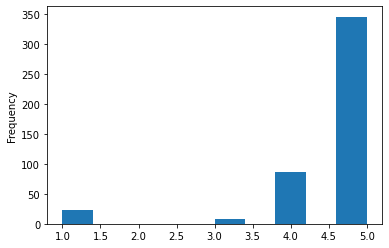

In [ ]:
df["rating"].plot.hist()

In [ ]:
df['sentiment'] = np.where(df['rating']>=4, 1, 0)

In [ ]:
train, test, y_train , y_test = train_test_split(df[['review']], df[['sentiment']], test_size = 0.3)

In [ ]:
from nltk.corpus import stopwords
german_stop_words = stopwords.words('german')

In [ ]:
stopwords.words('german')

In [ ]:
from nltk import sent_tokenize, word_tokenize
def clean_text(df):
    import re
    corpus = []
    for i in range(0, df.shape[0]):        
        review = re.sub('[^A-Za-z0-9]'," ",df['review'].iloc[i])
        review = word_tokenize(review)        
        review = [word for word in review if word.lower() not in set(stopwords.words('german'))]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [ ]:
train['review'].iloc[0]

In [ ]:
tr_corpus = clean_text(train)
te_corpus = clean_text(test)

In [ ]:
cv = CountVectorizer(max_features=10000,ngram_range=(1,4),dtype=np.int8,stop_words=german_stop_words, analyzer='word')
X_cv = cv.fit_transform(tr_corpus).toarray()
X_test_cv = cv.transform(te_corpus).toarray()

In [ ]:
print('Vocabulary Size {}:'.format(len(cv.vocabulary_)))
print('Vocabulary Size {}:'.format(cv.vocabulary_))

Vocabulary Size 5000:
Vocabulary Size {'kompltte': 1334, 'sortiment': 3949, 'mount': 2731, 'hagen': 746, 'bio': 187, 'fair': 439, 'trade': 4187, 'zertifiziert': 4813, 'landkaffees': 1566, 'gibt': 687, 'beste': 165, 'gerade': 629, 'gro': 710, 'artig': 85, 'schokoladig': 3892, 'ganz': 549, 'weich': 4392, 'aromatisch': 78, 'lecker': 1658, 'darum': 306, 'maximal': 2357, 'sterne': 4036, 'kompltte sortiment': 1335, 'sortiment mount': 3950, 'mount hagen': 2734, 'bio fair': 191, 'fair trade': 447, 'zertifiziert landkaffees': 4820, 'landkaffees gibt': 1567, 'gro artig': 711, 'weich aromatisch': 4393, 'lecker darum': 1667, 'maximal sterne': 2358, 'kompltte sortiment mount': 1336, 'sortiment mount hagen': 3951, 'mount hagen bio': 2738, 'bio fair trade': 192, 'zertifiziert landkaffees gibt': 4821, 'landkaffees gibt demeterqualit': 1568, 'weich aromatisch lecker': 4394, 'lecker darum maximal': 1668, 'wirklich': 4606, 'sagen': 3832, 'barista': 107, 'caf': 242, 'crema': 276, 'einzige': 378, 'gehandel

In [ ]:
rf = RandomForestClassifier(n_estimators=500)

In [ ]:
rf.fit(X_cv, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.predict(X_test_cv)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
rf.predict_proba(X_test_cv)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf.predict_proba(X_test_cv)[::, 1])

0.7334280303030303

In [ ]:
##

In [ ]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

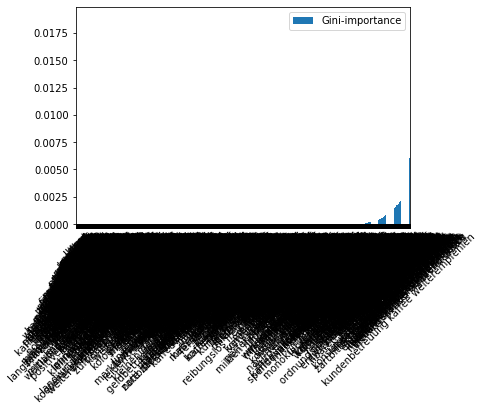

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(cv.vocabulary_, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [ ]:
importances.describe()

,Gini-importance
count,5000.000000
mean,0.000200
std,0.000826
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.018959


In [ ]:
selected_importance = importances.loc[importances['Gini-importance']> 0.01, :]

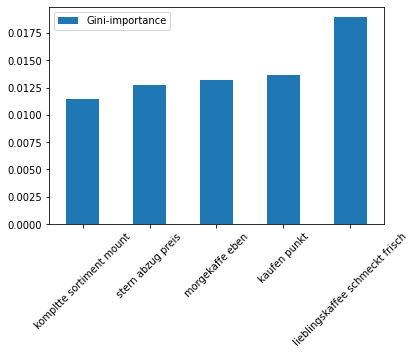

In [ ]:
selected_importance.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
##
test_copy = test.copy()
test_copy['sentiment'] = y_test
test_copy['pred'] = rf.predict_proba(X_test_cv)[::, 1]

In [ ]:
bad_test = test_copy.loc[test_copy['sentiment'] == 0, :]
bad_test.head(10)

,review,sentiment,pred
36,"Ich nutze von REWE Bio Röstkaffee Fairtrade die Kaffeepads für meine Senseomaschiene. Ich habe schon einige Biokaffees ausprobiert und muss sagen, dass mir der REWE Bio Röstkaffee Fairtrade am Besten schmeckt. Das Preis/Leistungsverhältnis ist super, wenn man bedenkt, wie teuer die original Senseopads sind (ohne Bio und Fairtradesiegel!).",0,0.792000
102,"Aus einigen Testberichten verschiedener Internet-Communitys wurde darauf hingewiesen das die Handelskette nicht transparent ist und auch der Ursprung des Kaffees nicht eindeutig ist. Auch die Verpackung ist nicht wirklich aus nachhaltigen Materialien. Ich finde die Firmen-Philosophie fragwürdig. Bio, Fairtrade und Nachhaltige Verpackung sollten sich meiner Meinung nach ergänzen.",0,0.994000
58,"diesen Kaffee kann man nicht trinken, das so was Kaffee genannt wird ist befremdend, würde ich nie mehr kaufen! Ist einfach ein grauenvolles Abwaschwasser, egal ob fair trade oder nicht – schmeckt einfach furchtbar. Ich habe die fast volle Packung in den Müll geworfen.",0,0.992000
43,"Kaffeebörse in Nairobi: Für Fairtrade Kaffee gibt es einen Festpreis – der liegt aber nur knapp über den Weltmarkt-Niveau. Um eine bäuerliche Mittelschicht aufzubauen, müssten die Pflückerinnen und der Bauer mit midestens 10 Cent pro Tasse entlohnt werden. Im Schnitt liget das Gehalt aber nur bei ca. 3 US Doller am Tag. Des weiteren ist der Zoll von rohen Kaffeebohnen zu niedrig. Wirklich Fair wäre es, wenn die Bauern ihren Kaffe selbst rösten, verpacken und vermarkten könnten. Denn für gerösteten Kaffee liegt der Zoll deutlich höher.",0,0.966667
77,"Ich hatte ähnliche Erfahrungen wie NicoH. Immer noch keine Lieferung, kein Geld zurück und keine Rückantwort vom Kundenservice. Würde hier nie wieder bestellen! Insbesondere da der Kundenservice es noch nicht einmal für nötif hält zu antworten. Bin sehr enttäuscht von dieser Behandlung und kann nur davon abraten hier zu bestellen.",0,0.954000
42,Fairtrade Logo = Armut light &amp; keine Transparenz,0,0.994000
99,"Der Kaffee ist große Klasse, da gibt es nachwievor nix zu meckern dran. Aber Inhalt ist nicht alles. Die letzte Verpackung hat in der Papierhülle jetzt Plastik mit reingemischt. Ich frag mich, wozu das gut sein soll. Für mich ein Grund zum Punkteabzug.",0,0.987333
60,"Der Kaffee schmeckt auf jeden Fall sehr gut und aromatisch. Dass es ihn nur in Bohnenform gibt, stört mich persönlich nicht, da ich meinen Kaffee morgens sowieso am liebsten frisch in meiner Handmühle mahle. Irritiert bin ich nur wirklich sehr durch den geringen Preis. Kann das wirklich so fair vonstatten gehen? Daher vergebe ich nur drei Sterne.",0,0.975000


In [ ]:
## Tet on your own Sentence

In [ ]:
corpus = ['Ich hasse diesen Kaffee. Schmeckt schlecht. stern abzug preis. nie wieder']

In [ ]:
own_text = cv.transform(corpus).toarray()

In [ ]:
rf.predict_proba(own_text)

array([[0.024, 0.976]])

In [ ]:
df.columns

Index(['brand', 'rating', 'review', 'sentiment'], dtype='object')

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
bad_reviews = df.loc[df['rating']<3, ['review', 'rating']]
bad_reviews.head()

,review,rating
28,"Da es unsere Sorte grad nicht gab, haben wir den REWE Bio Röstkaffee Fairtrade gekauft und dieser hat uns überzeugt. Der Kaffee schmeckt vollmundig und mild und es gibt ihn zu einem guten Preis-/ Leistungsverhältnis. Dieser werden wir jetzt öfters kaufen.",1
29,"Dafür, dass der Kaffee laut Fernsehwerbung extrem schonen und mit niedriger Temperatur geröstet wird, enthält er einige verbrannte Bohnen. Ferner wird der Kaffee mit Schalen gestreckt. Das hört man im Mahlwerk ab und zu. Man kann aber auch einfach mal den Kaffee auf weißes Papier oder ein Tuch schütten (vielleicht 2 Eßlöffel) und sich das Bohnenbild anschauen. Habe bei Tchibo angerufen und mich beschwert. Am Telefon bekam ich gesagt, dass man diesbezüglich nichts machen könne. Schade; nie wieder!",1
36,"Ich nutze von REWE Bio Röstkaffee Fairtrade die Kaffeepads für meine Senseomaschiene. Ich habe schon einige Biokaffees ausprobiert und muss sagen, dass mir der REWE Bio Röstkaffee Fairtrade am Besten schmeckt. Das Preis/Leistungsverhältnis ist super, wenn man bedenkt, wie teuer die original Senseopads sind (ohne Bio und Fairtradesiegel!).",1
37,Naturland von Rewe,1
38,"Naturland gibt auf ihrer Internetseite an, dass Sie den Öko-Landbau stärken wollen. Was prinzipiell erst mal nicht schlecht ist. Mit der Rewe Kooperation wird ihnen dieses auch gelingen. Bio aus dem Supermarkt ist oft billiger als die Ware aus dem Bioladen. Um die Bio-Ware so günstig verkaufen zu können, drücken die Supermärkte die Preise bei den Erzeugern.",1


Und das ist die absolut wichtigste Lektion: Shit in. Shit out